In [51]:
# T1:线性回归的闭式解
import numpy
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 读取实验数据
data, target = load_svmlight_file('/root/data.svm')
# 切分数据集
X_train, X_val, Y_train, Y_val = train_test_split(data, target, test_size=0.2, random_state=42)
# 选取一个Loss函数, 这里选择均方误差
def mse_loss(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

# 获取闭式解的公式
# 公式为 W = (X^T * X)^(-1) * X^T * y

X_train = X_train.toarray()
X_val = X_val.toarray()
X_train_T = X_train.T

# 通过闭式解得到参数w的值
W = numpy.linalg.inv(X_train_T.dot(X_train)).dot(X_train_T).dot(Y_train)

# 在训练集和验证集上测试并获得Loss函数值
y_train_pred = X_train.dot(W)
y_val_pred = X_val.dot(W)

loss_train = mse_loss(Y_train, y_train_pred)
loss_val = mse_loss(Y_val, y_val_pred)

# 输出loss_train和loss_val的值
print(f'训练集上的损失值: {loss_train}')
print(f'验证集上的损失值: {loss_val}')


训练集上的损失值: 23.699424162668866
验证集上的损失值: 28.097870774546735


最终训练集上的损失值: 502.01953648832347
最终验证集上的损失值: 439.2305382279829


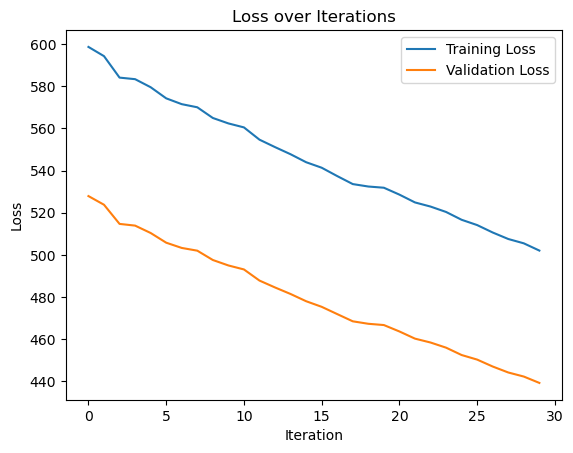

In [40]:
# T2:线性回归和随机梯度下降
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 读取实验数据
data, target = load_svmlight_file('/root/data.svm')
# 切分数据集
X_train, X_val, Y_train, Y_val = train_test_split(data, target, test_size=0.2, random_state=42)

# 转换为数组
X_train = X_train.toarray()
X_val = X_val.toarray()

# 线性模型参数初始化, 使用全零初始化
W = np.zeros(X_train.shape[1])

# 选择Loss函数（均方误差）及对其求导

def mse_loss(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mse_gradient(X, y, W):
    y_pred = X.dot(W)
    error = y_pred - y
    gradient = X.T.dot(error) / len(y)
    return gradient

# 更新模型参数

# η 学习率，用于控制每次更新的步长
η = 0.001
num_iterations = 30
loss_train_history = []
loss_val_history = []

for i in range(num_iterations):
    # 随机选取训练集中的一个样本
    idx = np.random.randint(0, X_train.shape[0])
    X_sample = X_train[idx:idx+1]
    y_sample = Y_train[idx:idx+1]
    
    # 求得该样本对Loss函数的梯度
    gradient = mse_gradient(X_sample, y_sample, W)
    
    # 取梯度的负方向
    D = -gradient
    
    # 更新模型参数
    W = W + η * D
    
    # 在训练集和验证集上测试并得到Loss函数值
    y_train_pred = X_train.dot(W)
    y_val_pred = X_val.dot(W)
    
    loss_train = mse_loss(Y_train, y_train_pred)
    loss_val = mse_loss(Y_val, y_val_pred)
    
    loss_train_history.append(loss_train)
    loss_val_history.append(loss_val)

# 输出loss_train和loss_val的值，画出变化曲线图
print(f'最终训练集上的损失值: {loss_train_history[-1]}')
print(f'最终验证集上的损失值: {loss_val_history[-1]}')

plt.plot(loss_train_history, label='Training Loss')
plt.plot(loss_val_history, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Iterations')
plt.show()

最终训练集上的损失值: 0.2885617903389425
最终测试集上的损失值: 0.18576852588255305


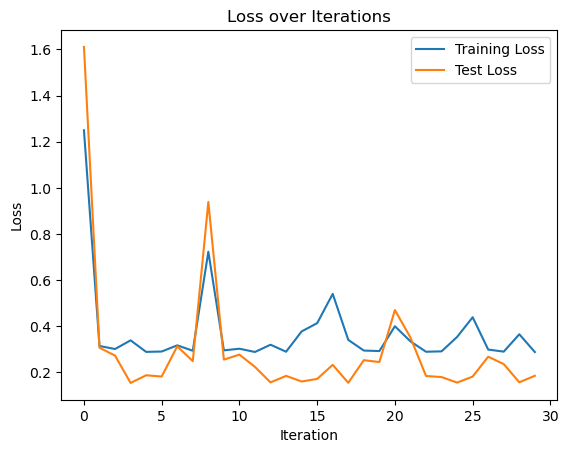

In [50]:
# T3:机器学习预测
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 使用 pandas 读取 CSV 数据文件
data = pd.read_csv('/root/TrainSet.csv')

# 数据预处理

# 检查数据是否包含缺失值或非数值数据
data = data.apply(pd.to_numeric, errors='coerce')  # 将非数值数据转换为 NaN
data = data.dropna()  # 删除包含 NaN 的行

# 去除最后一列为 0 的数据行，明显错误数据
data = data[data.iloc[:, -1] != 0]

# 提取特征和标签
X = data.iloc[:, :-1].values  # 前28列是特征
y = data.iloc[:, -1].values   # 最后一列是标签

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 线性模型参数初始化（全零初始化）
W = np.zeros(X_train.shape[1])

# 选择Loss函数及对其求导（均方误差）
def mse_loss(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mse_gradient(X, y, W):
    y_pred = X.dot(W)
    error = y_pred - y
    gradient = X.T.dot(error) / len(y)
    return gradient

# 更新模型参数
learning_rate = 0.0000032
num_iterations = 30
loss_train_history = []
loss_test_history = []

for i in range(num_iterations):
    # 随机选取训练集中的一个样本
    idx = np.random.randint(0, X_train.shape[0])
    X_sample = X_train[idx:idx+1]
    y_sample = y_train[idx:idx+1]
    
    # 求得该样本对Loss函数的梯度
    gradient = mse_gradient(X_sample, y_sample, W)
    
    # 取梯度的负方向
    D = -gradient
    
    # 更新模型参数
    W = W + learning_rate * D
    
    # 在训练集和测试集上测试并得到Loss函数值
    y_train_pred = X_train.dot(W)
    y_test_pred = X_test.dot(W)
    
    loss_train = mse_loss(y_train, y_train_pred)
    loss_test = mse_loss(y_test, y_test_pred)
    
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

# 输出loss_train和loss_test的值，画出变化曲线图
print(f'最终训练集上的损失值: {loss_train_history[-1]}')
print(f'最终测试集上的损失值: {loss_test_history[-1]}')

plt.plot(loss_train_history, label='Training Loss')
plt.plot(loss_test_history, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Iterations')
plt.show()